In [3]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-11-29,217.00,220.65,213.9,218.50,218.75,2173966.0,4728.62
1,2018-11-28,217.40,221.45,215.2,215.65,216.00,977424.0,2130.79
2,2018-11-27,218.95,219.95,214.0,217.75,217.75,1863491.0,4039.51
3,2018-11-26,217.45,218.90,213.0,218.10,217.65,1452206.0,3133.20
4,2018-11-22,219.00,219.70,214.8,215.75,215.90,967411.0,2099.53


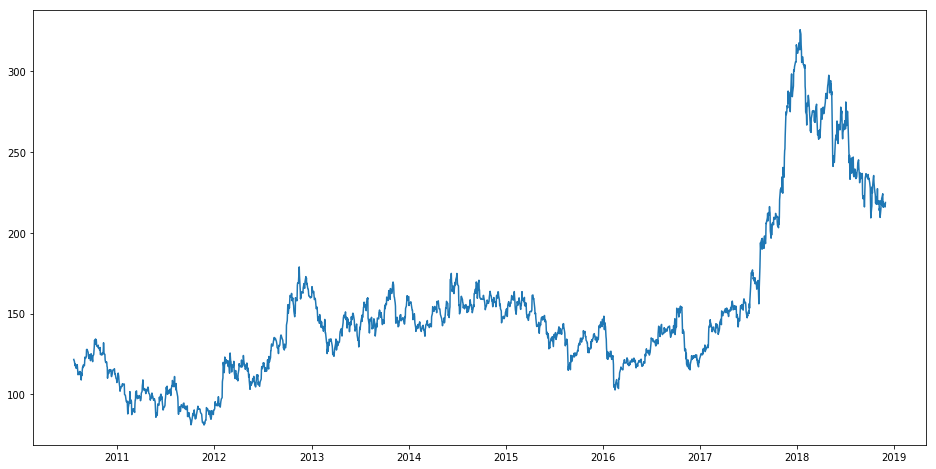

In [5]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')


In [26]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

#splitting into train and validation
train = new_data[:1556]
valid = new_data[1556:]

new_data.shape, train.shape, valid.shape

((2075, 2), (1556, 2), (519, 2))

In [27]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()


(Timestamp('2010-07-21 00:00:00'),
 Timestamp('2016-10-26 00:00:00'),
 Timestamp('2016-10-27 00:00:00'),
 Timestamp('2018-11-29 00:00:00'))

In [28]:
#make predictions
preds = []
for i in range(0,519):
    a = train['Close'][len(train)-519+i:].sum() + sum(preds)
    b = a/519
    preds.append(b)

In [29]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

97.39411497909916

C:\Users\Devansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Devansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


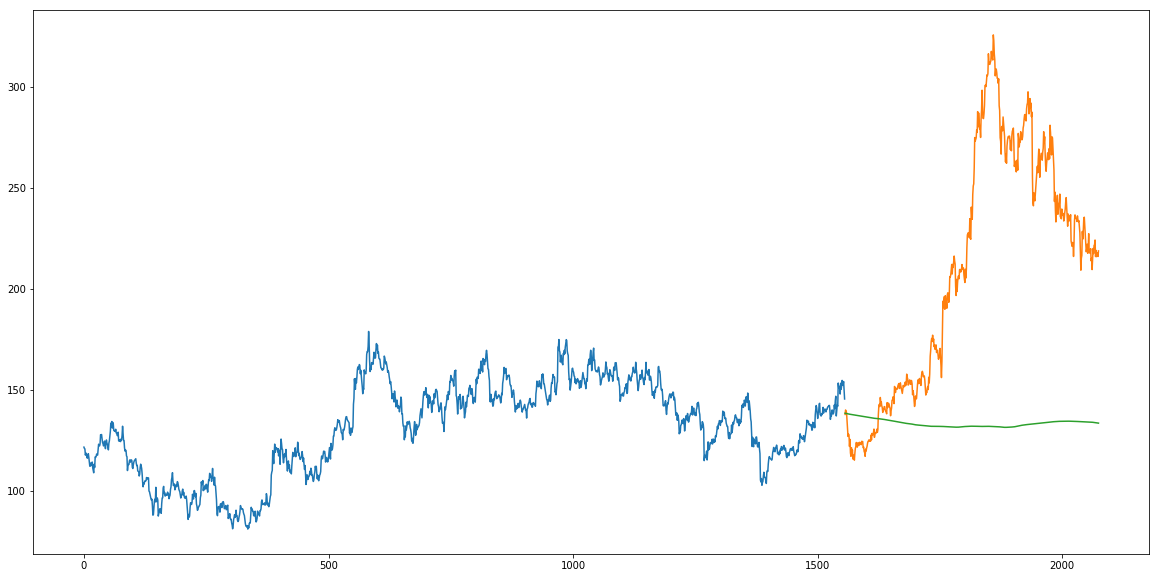

In [30]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])